## Model : RNN
RNN(Recurrent Neural Network) handles sequences which is different from a fully connected DNN showed previously.
The key idea here: time-series datasets are sequences.
Step 1: Data Preprocessing
RNN input shape: (batch_size, window size, input_features)
Import helper function to create matrix

In [1]:
import pandas as pd
data = pd.read_csv("timeseries_salesdata.csv")
data.set_index("Date", inplace =True)
test_set = pd.DataFrame(data['Sales'].tail(96))

In [2]:
data.head() 

,Sales
Date,
11-Apr-18,4388.23
12-Apr-18,5206.76
13-Apr-18,1784.65
14-Apr-18,2419.71
15-Apr-18,2462.46


In [3]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [4]:
def convert2matrix(data_arr, look_back):
   X, Y =[], []
   for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,])
        Y.append(data_arr[d,])
   return np.array(X), np.array(Y)

In [5]:
train_size = 900
train,test = data.values[0:train_size,:], data.values[train_size:len(data.values),:]
look_back = 30 #create window size as look_back=30
test = np.append(test,np.repeat(test[-1,], look_back))
train = np.append(train,np.repeat(train[-1,],look_back))
trainX,trainY =convert2matrix(train,look_back)
testX,testY =convert2matrix(test, look_back)
# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [6]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(900, 1, 30)
(900,)
(96, 1, 30)
(96,)


In [7]:
#Step 2: Define neural network shape and compile model
#Built a RNN model with two hidden layers.

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping
def model_rnn(look_back):
  model=Sequential()
  model.add(SimpleRNN(units=32, input_shape=(1,look_back), activation="relu"))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
  return model

In [8]:
##Step 3: Fit Model
model=model_rnn(look_back)
history=model.fit(trainX,trainY, epochs=100, batch_size=30, verbose=1, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
30/30 [==============================] - 66s 108ms/step - loss: 3176454.8468 - mse: 3176454.7177 - mae: 1318.1602 - val_loss: 14825711.0000 - val_mse: 14825709.0000 - val_mae: 2974.8672
Epoch 2/100
30/30 [==============================] - 0s 13ms/step - loss: 1731021.9980 - mse: 1731021.9980 - mae: 901.2759 - val_loss: 11772784.0000 - val_mse: 11772784.0000 - val_mae: 2604.5598
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 1490313.9516 - mse: 1490313.9516 - mae: 835.6201 - val_loss: 10505449.0000 - val_mse: 10505449.0000 - val_mae: 2432.9490
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 1319752.8105 - mse: 1319752.9234 - mae: 780.8094 - val_loss: 9687671.0000 - val_mse: 9687671.0000 - val_mae: 2287.6042
Epoch 5/100
30/30 [==============================] - 0s 11ms/step - loss: 1201932.7198 - mse: 1201932.7198 - mae: 742.9614 - val_loss: 9224313.0000 - val_mse: 9224313.0000 - val_mae: 2177.5276
Epoch 6/100
30/30 [=======

30/30 [==============================] - 0s 10ms/step - loss: 730849.8952 - mse: 730849.8952 - mae: 549.9803 - val_loss: 5391230.5000 - val_mse: 5391230.5000 - val_mae: 1586.3779
Epoch 44/100
30/30 [==============================] - 0s 8ms/step - loss: 728325.3750 - mse: 728325.3327 - mae: 547.8550 - val_loss: 5387735.5000 - val_mse: 5387735.5000 - val_mae: 1584.6788
Epoch 45/100
30/30 [==============================] - 0s 10ms/step - loss: 726849.7238 - mse: 726849.7560 - mae: 548.7292 - val_loss: 5401458.5000 - val_mse: 5401458.5000 - val_mae: 1590.3115
Epoch 46/100
30/30 [==============================] - 0s 6ms/step - loss: 723075.4970 - mse: 723075.4970 - mae: 545.9260 - val_loss: 5476203.5000 - val_mse: 5476203.5000 - val_mae: 1587.0660


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                2016      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 2,289
Trainable params: 2,289
Non-trainable params: 0
_________________________________________________________________


In [10]:
test_pred = model.predict(testX)

In [11]:
len(test_pred)

96

In [12]:
rnnfore = pd.DataFrame(test_pred)
rnnfore.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_RNNforecasts_dataframe.csv",index = False,header=True)

In [13]:
actual_fore=test_set.rename(columns={"Sales":"Actual Sales"})
actual_fore["RNN"]=rnnfore.values
RNN=actual_fore
RNN

,Actual Sales,RNN
Date,,
27-Sep-20,8414.80,5999.832520
28-Sep-20,5923.40,6698.330566
29-Sep-20,4592.55,11534.750000
30-Sep-20,6561.50,5447.466797
1-Oct-20,4599.50,9496.896484
...,...,...
27-Dec-20,3116.25,5412.407715
28-Dec-20,7736.05,5025.586426
29-Dec-20,6981.61,5174.637207


In [14]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('RNN model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

Train Root Mean Squared Error(RMSE): 1062.36; Train Mean Absolute Error(MAE) : 680.74 
Test Root Mean Squared Error(RMSE): 2340.13; Test Mean Absolute Error(MAE) : 1587.07 


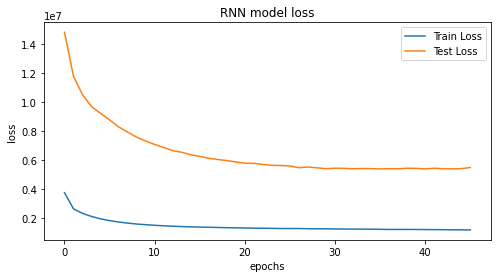

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#Step 4: Model Evaluation
#Print out error metrics and generate model loss plot.
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '
      % (np.sqrt(mean_squared_error(trainY, train_predict[:,0])), mean_absolute_error(trainY, train_predict[:,0])))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
      % (np.sqrt(mean_squared_error(testY, test_predict[:,0])), mean_absolute_error(testY, test_predict[:,0])))
model_loss(history)

In [16]:
#Step 5. Visualizing Prediction
def prediction_plot(testY, test_predict,look_back):
    len_prediction=[x for x in range(len(testY)-look_back)]
    plt.plot(len_prediction, testY[:1], marker='.', label="actual")
    plt.plot(len_prediction, test_predict[1:], 'r', label="prediction")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Ads Daily Spend', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show()

In [17]:
print(len(train_predict))
print(len(test_predict))
#test_predict

900
96


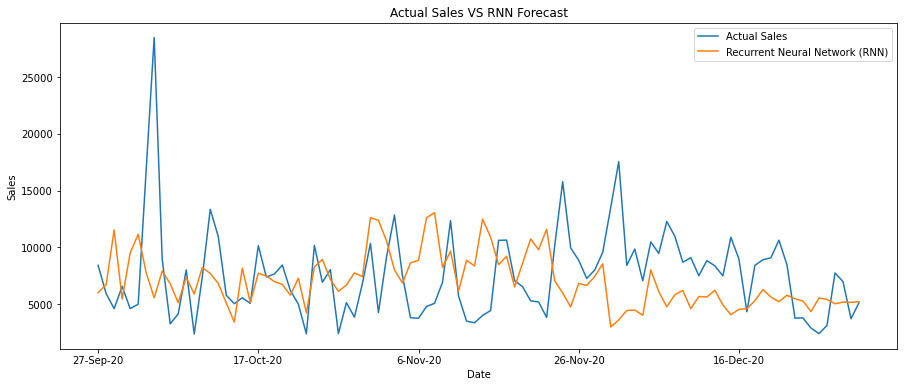

In [18]:
RNN['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
RNN['RNN'].plot(figsize=(15,6), label = "Recurrent Neural Network (RNN)")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS RNN Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [19]:
y_true1 = RNN["Actual Sales"].dropna()
y_pred1 = RNN["RNN"].dropna()

In [20]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
print(timeseries_evaluation_metrics_func(y_true1, y_pred1))

Evaluation metric results:-
MSE is : 23520316.92431921
MAE is : 3539.2968093872078
RMSE is : 4849.774935429397
MAPE is : 54.64100593317954
R2 is : -0.5793715390255414

None
